In [131]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [132]:
df=pd.read_csv("bank_customer_data.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [133]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


In [135]:
df['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [136]:
df.shape

(45211, 17)

### Analysis

In [137]:
df[df['y']==0].count().sum()

678674

In [138]:
job=df['job'].unique()
listy=[]
listn=[]

In [139]:
for i in job:
    listy.append(len(df[(df['job']==i) &  (df['y']==1)]))
    listn.append(len(df[(df['job']==i) &  (df['y']==0)]))    

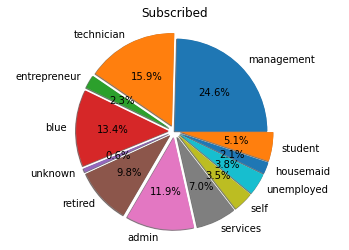

In [140]:
plt.pie(listy , labels=job,shadow=True,autopct='%1.1f%%',radius=3,explode=[0,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2])
plt.axis("equal")
plt.title('Subscribed')
plt.show()

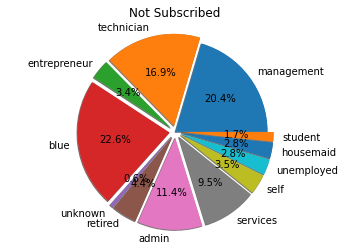

In [141]:
plt.pie(listn , labels=job,shadow=True,autopct='%1.1f%%',radius=3,explode=[0,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2])
plt.axis("equal")
plt.title('Not Subscribed')
plt.show()

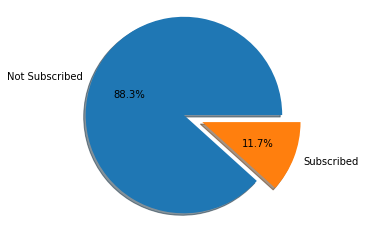

In [142]:
plt.pie([len(df[df['y']==0]),len(df[df['y']==1])] , labels=['Not Subscribed','Subscribed'],shadow=True,autopct='%1.1f%%',explode=[0,0.2])
plt.axis("equal")
plt.show()

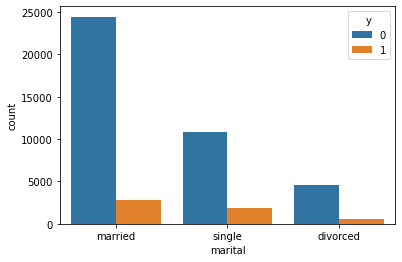

In [143]:
sns.countplot(data=df,x='marital',hue='y')

From above graph we can conclude that marital status has some sort of effect on o/p

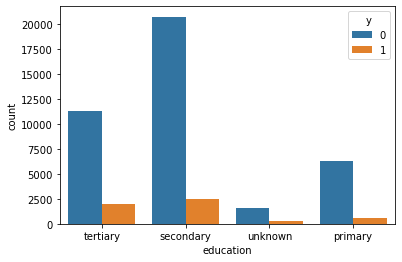

In [144]:
sns.countplot(data=df,x='education',hue='y')

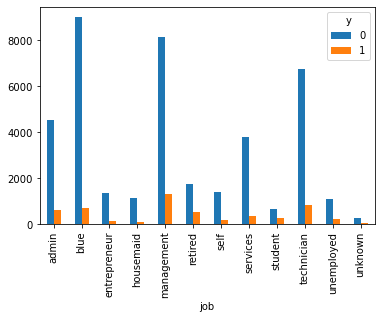

In [145]:
pd.crosstab(df.job,df.y).plot(kind='bar')

No much effect on o/p

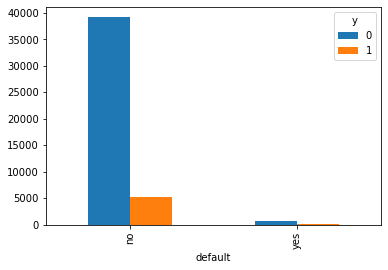

In [146]:
pd.crosstab(df.default,df.y).plot(kind='bar')

No effect

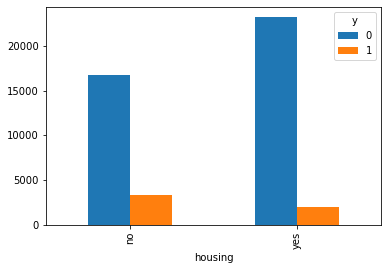

In [147]:
pd.crosstab(df.housing,df.y).plot(kind='bar')

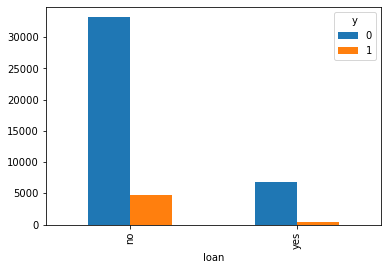

In [148]:
pd.crosstab(df.loan,df.y).plot(kind='bar')

In [149]:
df['day'].unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31],
      dtype=int64)

In [150]:
df['campaign'].unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44],
      dtype=int64)

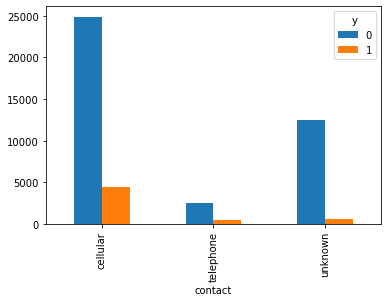

In [151]:
pd.crosstab(df.contact,df.y).plot(kind='bar')

In [152]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [153]:
df['previous'].unique()

array([  0,   3,   1,   4,   2,  11,  16,   6,   5,  10,  12,   7,  18,
         9,  21,   8,  14,  15,  26,  37,  13,  25,  20,  27,  17,  23,
        38,  29,  24,  51, 275,  22,  19,  30,  58,  28,  32,  40,  55,
        35,  41], dtype=int64)

In [154]:
df['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

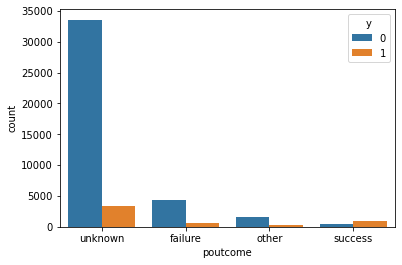

In [155]:
sns.countplot(data=df,x='poutcome',hue='y')

In [156]:
df1=df.drop(['job','default'],axis=1)

In [157]:
df1.head()

,age,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,married,tertiary,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,single,secondary,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,married,secondary,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,married,unknown,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,single,unknown,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


### Preprocessing

In [158]:
df_edu=pd.get_dummies(df1['education'])

In [159]:
df_edu.drop(['unknown'],axis=1,inplace=True)

In [160]:
df1.drop('education',axis=1,inplace=True)

In [161]:
df1=pd.concat([df1,df_edu],axis=1)

In [162]:
df1.head()

,age,marital,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,primary,secondary,tertiary
0,58,married,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0,0,0,1
1,44,single,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0,0,1,0
2,33,married,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0,0,1,0
3,47,married,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0,0,0,0
4,33,single,1,no,no,unknown,5,may,198,1,-1,0,unknown,0,0,0,0


In [163]:
df_marital=pd.get_dummies(df['marital'],drop_first=True)

In [164]:
df_marital.head()

,married,single
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1


In [165]:
df1.drop('marital',axis=1,inplace=True)

In [166]:
df1=pd.concat([df1,df_marital],axis=1)

In [167]:
df1.head()

,age,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,primary,secondary,tertiary,married,single
0,58,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0,0,0,1,1,0
1,44,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0,0,1,0,0,1
2,33,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0,0,1,0,1,0
3,47,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0,0,0,0,1,0
4,33,1,no,no,unknown,5,may,198,1,-1,0,unknown,0,0,0,0,0,1


In [168]:
df1['housing']=df1['housing'].apply(lambda x:1 if x=='yes' else 0)

In [169]:
df1.head()

,age,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,primary,secondary,tertiary,married,single
0,58,2143,1,no,unknown,5,may,261,1,-1,0,unknown,0,0,0,1,1,0
1,44,29,1,no,unknown,5,may,151,1,-1,0,unknown,0,0,1,0,0,1
2,33,2,1,yes,unknown,5,may,76,1,-1,0,unknown,0,0,1,0,1,0
3,47,1506,1,no,unknown,5,may,92,1,-1,0,unknown,0,0,0,0,1,0
4,33,1,0,no,unknown,5,may,198,1,-1,0,unknown,0,0,0,0,0,1


In [170]:
df1['loan']=df1['loan'].apply(lambda x:1 if x=='yes' else 0)

In [171]:
df1.head()

,age,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,primary,secondary,tertiary,married,single
0,58,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0,0,0,1,1,0
1,44,29,1,0,unknown,5,may,151,1,-1,0,unknown,0,0,1,0,0,1
2,33,2,1,1,unknown,5,may,76,1,-1,0,unknown,0,0,1,0,1,0
3,47,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0,0,0,0,1,0
4,33,1,0,0,unknown,5,may,198,1,-1,0,unknown,0,0,0,0,0,1


In [172]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df1['contact']=lb.fit_transform(df1['contact'])

In [173]:
df1.head()

,age,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,primary,secondary,tertiary,married,single
0,58,2143,1,0,2,5,may,261,1,-1,0,unknown,0,0,0,1,1,0
1,44,29,1,0,2,5,may,151,1,-1,0,unknown,0,0,1,0,0,1
2,33,2,1,1,2,5,may,76,1,-1,0,unknown,0,0,1,0,1,0
3,47,1506,1,0,2,5,may,92,1,-1,0,unknown,0,0,0,0,1,0
4,33,1,0,0,2,5,may,198,1,-1,0,unknown,0,0,0,0,0,1


In [174]:
df1['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

### Mean Encoding

In [175]:
u=df1['month'].unique()
dict1={}
for i in u:
    dict1[i]=len(df1[(df1['month']==i) & (df1['y']==1) ])/len(df1[df1['month']==i])

In [176]:
dict1

{'may': 0.06719453726572715,
 'jun': 0.10222804718217562,
 'jul': 0.09093546047860769,
 'aug': 0.11013286377461182,
 'oct': 0.43766937669376693,
 'nov': 0.10151133501259446,
 'dec': 0.4672897196261682,
 'jan': 0.10121168923734854,
 'feb': 0.1664779161947905,
 'mar': 0.519916142557652,
 'apr': 0.19679399727148705,
 'sep': 0.46459412780656306}

In [177]:
df1['month']=df1['month'].map(dict1)

In [178]:
df1.head()

,age,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,primary,secondary,tertiary,married,single
0,58,2143,1,0,2,5,0.067195,261,1,-1,0,unknown,0,0,0,1,1,0
1,44,29,1,0,2,5,0.067195,151,1,-1,0,unknown,0,0,1,0,0,1
2,33,2,1,1,2,5,0.067195,76,1,-1,0,unknown,0,0,1,0,1,0
3,47,1506,1,0,2,5,0.067195,92,1,-1,0,unknown,0,0,0,0,1,0
4,33,1,0,0,2,5,0.067195,198,1,-1,0,unknown,0,0,0,0,0,1


In [179]:
df1['month'].unique()

array([0.06719454, 0.10222805, 0.09093546, 0.11013286, 0.43766938,
       0.10151134, 0.46728972, 0.10121169, 0.16647792, 0.51991614,
       0.196794  , 0.46459413])

### Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x9fd98f7908>,
 'caps': [<matplotlib.lines.Line2D at 0x9fd9906080>,
 'boxes': [<matplotlib.lines.Line2D at 0x9fd98f77b8>],
 'medians': [<matplotlib.lines.Line2D at 0x9fd9906780>],
 'fliers': [<matplotlib.lines.Line2D at 0x9fd9906b00>],
 'means': []}

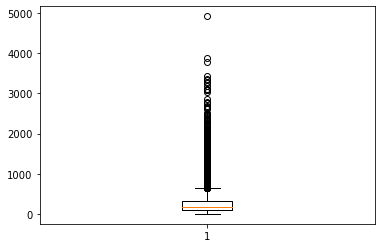

In [180]:
plt.boxplot(df1["duration"])

In [181]:
m1=np.mean(df1['duration'])
st1=np.std(df1['duration'])

In [182]:
df2=df1.loc[(df1['duration'] > m1- 2*st1) & (df1['duration'] < m1 + 2*st1)]

In [183]:
print(df1.shape)
print(df2.shape)

(45211, 18)
(43113, 18)


{'whiskers': [<matplotlib.lines.Line2D at 0x9fd995ba20>,
 'caps': [<matplotlib.lines.Line2D at 0x9fd996b160>,
 'boxes': [<matplotlib.lines.Line2D at 0x9fd995b8d0>],
 'medians': [<matplotlib.lines.Line2D at 0x9fd996b860>],
 'fliers': [<matplotlib.lines.Line2D at 0x9fd996bbe0>],
 'means': []}

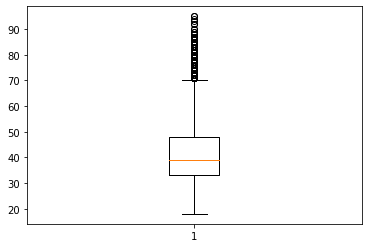

In [184]:
plt.boxplot(df2["age"])

In [185]:
df3=df2[df2['age']<=70]

In [186]:
df3.shape

(42658, 18)

{'whiskers': [<matplotlib.lines.Line2D at 0x9fd54ee128>,
 'caps': [<matplotlib.lines.Line2D at 0x9fd54ee860>,
 'boxes': [<matplotlib.lines.Line2D at 0x9fd54def98>],
 'medians': [<matplotlib.lines.Line2D at 0x9fd54eef60>],
 'fliers': [<matplotlib.lines.Line2D at 0x9fd54f7320>],
 'means': []}

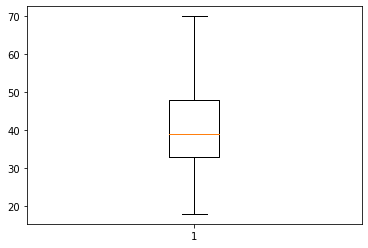

In [187]:
plt.boxplot(df3["age"])

{'whiskers': [<matplotlib.lines.Line2D at 0x9fca4d25c0>,
 'caps': [<matplotlib.lines.Line2D at 0x9fd613dda0>,
 'boxes': [<matplotlib.lines.Line2D at 0x9fd8873e10>],
 'medians': [<matplotlib.lines.Line2D at 0x9fd8957320>],
 'fliers': [<matplotlib.lines.Line2D at 0x9fd8875668>],
 'means': []}

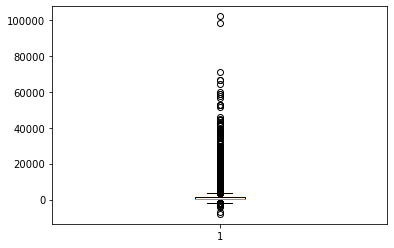

In [188]:
plt.boxplot(df3["balance"])

In [189]:
quart1=df3['balance'].quantile(0.25)
quart3=df3['balance'].quantile(0.75)
IQR=quart3-quart1
low_val=quart1-1.5*IQR
high_val=quart3+1.5*IQR

In [190]:
df4=df3.loc[(df3['balance'] > low_val) & (df3['balance'] < high_val)]

In [191]:
print(df4.shape)

(38175, 18)


{'whiskers': [<matplotlib.lines.Line2D at 0x9fd9d480f0>,
 'caps': [<matplotlib.lines.Line2D at 0x9fd9d48898>,
 'boxes': [<matplotlib.lines.Line2D at 0x9fd9d43ba8>],
 'medians': [<matplotlib.lines.Line2D at 0x9fd9910160>],
 'fliers': [<matplotlib.lines.Line2D at 0x9fd9910cf8>],
 'means': []}

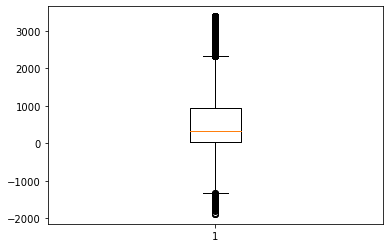

In [192]:
plt.boxplot(df4["balance"])

In [193]:
df4.head()

,age,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,primary,secondary,tertiary,married,single
0,58,2143,1,0,2,5,0.067195,261,1,-1,0,unknown,0,0,0,1,1,0
1,44,29,1,0,2,5,0.067195,151,1,-1,0,unknown,0,0,1,0,0,1
2,33,2,1,1,2,5,0.067195,76,1,-1,0,unknown,0,0,1,0,1,0
3,47,1506,1,0,2,5,0.067195,92,1,-1,0,unknown,0,0,0,0,1,0
4,33,1,0,0,2,5,0.067195,198,1,-1,0,unknown,0,0,0,0,0,1


In [194]:
df4['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [195]:

x1=df4[df4['poutcome']=='unknown']
x2=df4[df4['poutcome'] != 'unknown']
xtrain=x2.drop('poutcome',axis=1)
ytrain=x2['poutcome']
xtest=x1.drop('poutcome',axis=1)

In [196]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
pred=lr.predict(xtest)

C:\Users\KapilMangla\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [197]:
df4['poutcome'][df4['poutcome']=='unknown']=pred

C:\Users\KapilMangla\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\KapilMangla\Anaconda3\lib\site-packages\pandas\core\generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [198]:
df4.head()

,age,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,primary,secondary,tertiary,married,single
0,58,2143,1,0,2,5,0.067195,261,1,-1,0,success,0,0,0,1,1,0
1,44,29,1,0,2,5,0.067195,151,1,-1,0,failure,0,0,1,0,0,1
2,33,2,1,1,2,5,0.067195,76,1,-1,0,failure,0,0,1,0,1,0
3,47,1506,1,0,2,5,0.067195,92,1,-1,0,failure,0,0,0,0,1,0
4,33,1,0,0,2,5,0.067195,198,1,-1,0,success,0,0,0,0,0,1


In [199]:
df4['poutcome']=lb.fit_transform(df4['poutcome'])

C:\Users\KapilMangla\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [200]:
df4.head()

,age,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,primary,secondary,tertiary,married,single
0,58,2143,1,0,2,5,0.067195,261,1,-1,0,2,0,0,0,1,1,0
1,44,29,1,0,2,5,0.067195,151,1,-1,0,0,0,0,1,0,0,1
2,33,2,1,1,2,5,0.067195,76,1,-1,0,0,0,0,1,0,1,0
3,47,1506,1,0,2,5,0.067195,92,1,-1,0,0,0,0,0,0,1,0
4,33,1,0,0,2,5,0.067195,198,1,-1,0,2,0,0,0,0,0,1


### ML Modelling and parameter tuning

In [201]:
x=df4.drop('y',axis=1)
y=df4['y']

In [202]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scale=sc.fit_transform(x)

In [203]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_scale,y,random_state=99,test_size=0.3)

In [204]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
pred=lr.predict(xtest)

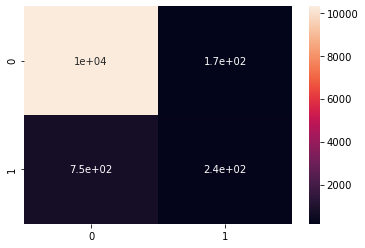

In [205]:
from sklearn.metrics import confusion_matrix,accuracy_score
k=confusion_matrix(ytest,pred)
sns.heatmap(k,annot=True)

In [206]:
accuracy_score(pred,ytest)

0.9198463284728892

In [207]:
lr.score(xtrain,ytrain)

0.9198039068931966

In [208]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [209]:
model_params = {
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='ovr',penalty='l1'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [210]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_scale,y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
best_ml = pd.DataFrame(scores,columns=['model','best_score','best_params'])
best_ml

,model,best_score,best_params
0,logistic_regression,0.907164,{'C': 5}


In [211]:
knn=KNeighborsClassifier(metric='euclidean')
knn.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [212]:
pred=knn.predict(xtest)

In [213]:
confusion_matrix(pred,ytest)

array([[10226,   683],
       [  242,   302]], dtype=int64)

In [214]:
accuracy_score(pred,ytest)

0.9192351348991531

In [215]:
knn.score(xtest,ytest)

0.9192351348991531

In [216]:
knn.score(xtrain,ytrain)

0.9385150812064965